## Understanding the dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

print('Number of attributes:', df.shape[1])
print('Number of records:', df.shape[0])

Number of attributes: 35
Number of records: 1470


In [31]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [32]:
# count missing values in each column
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [33]:
df.duplicated().sum()

0

## Data cleaning

In [34]:
# If you find any missing values in the dataset ( nan values) replace those data with the column wise mean.
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

#If you find any duplicates in the dataset, keep just one copy of the data.
df.drop_duplicates(inplace=True)

# Remember, if any row in the target column (Attrition) is missing, you must drop that row
df.dropna(subset=['Attrition'], inplace=True)

## Creation of input and output features

In [35]:
# You need to split the data into two parts. The “Features” variable will consist of all
# the columns in the dataset except the target column. And the “Labels” variable
# will contain only the column. Atrrition is the target column.

features = df.drop('Attrition', axis=1)
labels = df['Attrition']

# features
labels

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

## Conversion of features into numeric values

In [36]:
# Convert the columns into categorical type
for col in features.columns:
    if features[col].dtype == 'object':
        features[col] = features[col].astype('category')

# Label encoding for the target column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Perform one hot encoding
# features = pd.get_dummies(features, dtype=int)

# if feature has more than 2 categories, perform one hot encoding, else perform label encoding
for col in features.columns:
    if features[col].dtype.name == 'category' and len(features[col].cat.categories) > 2:
        features = pd.get_dummies(features, columns=[col], drop_first=True)
    elif features[col].dtype.name == 'category':
        features[col] = le.fit_transform(features[col])

# print how any are one hot encoded columns and how many are not
# print('Number of one hot encoded columns:', features.shape[1])

one_hot_encoded = [col for col in features.columns if '_' in col]
not_one_hot_encoded = [col for col in features.columns if col not in one_hot_encoded]

features

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,1,1,2,0,94,3,...,0,0,0,0,0,0,1,0,0,1
1,49,279,8,1,1,2,3,1,61,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,2,1,4,4,1,92,2,...,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,4,1,5,4,0,56,3,...,0,0,0,0,0,1,0,0,1,0
4,27,591,2,1,1,7,1,1,40,3,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,1,41,4,...,0,1,0,0,0,0,0,0,1,0
1466,39,613,6,1,1,2062,4,1,42,2,...,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,1,2064,2,1,87,4,...,0,0,0,1,0,0,0,0,1,0
1468,49,1023,2,3,1,2065,4,1,63,2,...,0,0,0,0,0,0,1,0,1,0


In [37]:

labels = le.fit_transform(labels)
# features = features.apply(le.fit_transform)

labels
#features

array([1, 0, 1, ..., 0, 0, 0])

## Scaling of the features:

In [38]:
# scaling the features, except the one hot encoded columns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def scale(option,features):
    if option == 'standard':
        scaler = StandardScaler()
    elif option == 'minmax':
        scaler = MinMaxScaler()
    features[not_one_hot_encoded] = scaler.fit_transform(features[not_one_hot_encoded])
    return features

# features = scale('standard',features)
features = scale('minmax',features)
features
# labels

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.010909,-0.891688,0.0,-1.701283,-0.660531,-1.224745,1.383138,0.379672,...,0,0,0,0,0,0,1,0,0,1
1,1.322365,-1.297775,-0.147150,-1.868426,0.0,-1.699621,0.254625,0.816497,-0.240677,-1.026167,...,0,0,0,0,0,1,0,0,1,0
2,0.008343,1.414363,-0.887515,-0.891688,0.0,-1.696298,1.169781,0.816497,1.284725,-1.026167,...,0,1,0,0,0,0,0,0,0,1
3,-0.429664,1.461466,-0.764121,1.061787,0.0,-1.694636,1.169781,-1.224745,-0.486709,0.379672,...,0,0,0,0,0,1,0,0,1,0
4,-1.086676,-0.524295,-0.887515,-1.868426,0.0,-1.691313,-1.575686,0.816497,-1.274014,0.379672,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,-0.891688,0.0,1.721670,0.254625,0.816497,-1.224807,1.785511,...,0,1,0,0,0,0,0,0,1,0
1466,0.227347,-0.469754,-0.393938,-1.868426,0.0,1.723332,1.169781,0.816497,-1.175601,-1.026167,...,0,0,0,0,0,0,0,0,1,0
1467,-1.086676,-1.605183,-0.640727,0.085049,0.0,1.726655,-0.660531,0.816497,1.038693,1.785511,...,0,0,0,1,0,0,0,0,1,0
1468,1.322365,0.546677,-0.887515,0.085049,0.0,1.728317,1.169781,0.816497,-0.142264,-1.026167,...,0,0,0,0,0,0,1,0,1,0


## Correlation Analysis:

In [39]:
labels_df = pd.DataFrame(labels, columns=['Attrition'])
# features = features.loc[:, (features != features.iloc[0]).any()] # remove constant columns
correlation = features.corrwith(labels_df['Attrition'])

correlation


Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeCount                             NaN
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
Gender                               0.029453
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
Over18                                    NaN
OverTime                             0.246118
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StandardHours                             NaN
StockOptionLevel                  

In [40]:
# top 20 columns with highest correlation
top_20 = correlation.abs().sort_values(ascending=False).head(20)
features_top_20 = features[top_20.index]
top_20_columns = top_20.index
# features_top_20
correlation[top_20.index]

OverTime                             0.246118
MaritalStatus_Single                 0.175419
TotalWorkingYears                   -0.171063
JobLevel                            -0.169105
YearsInCurrentRole                  -0.160545
MonthlyIncome                       -0.159840
Age                                 -0.159205
JobRole_Sales Representative         0.157234
YearsWithCurrManager                -0.156199
StockOptionLevel                    -0.137145
YearsAtCompany                      -0.134392
JobInvolvement                      -0.130016
BusinessTravel_Travel_Frequently     0.115143
JobSatisfaction                     -0.103481
EnvironmentSatisfaction             -0.103369
JobRole_Laboratory Technician        0.098290
MaritalStatus_Married               -0.090984
JobRole_Research Director           -0.088870
Department_Research & Development   -0.085293
JobRole_Manager                     -0.083316
dtype: float64

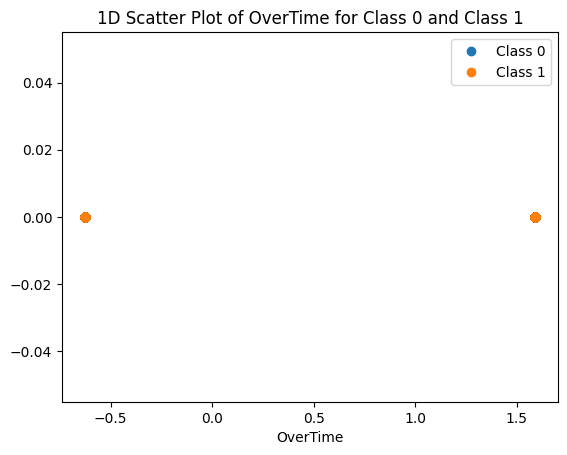

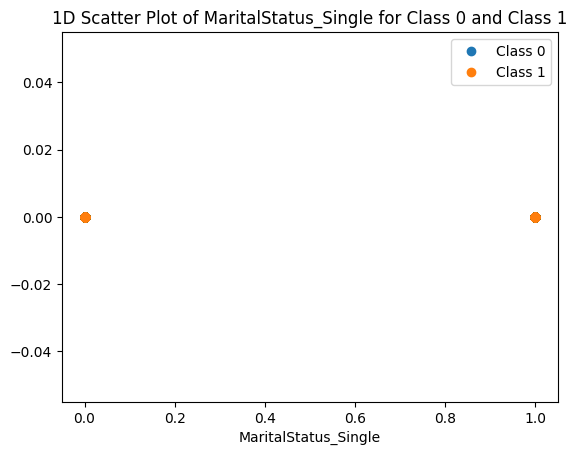

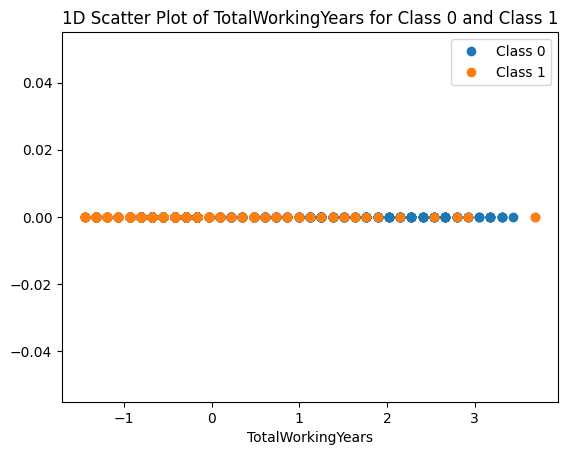

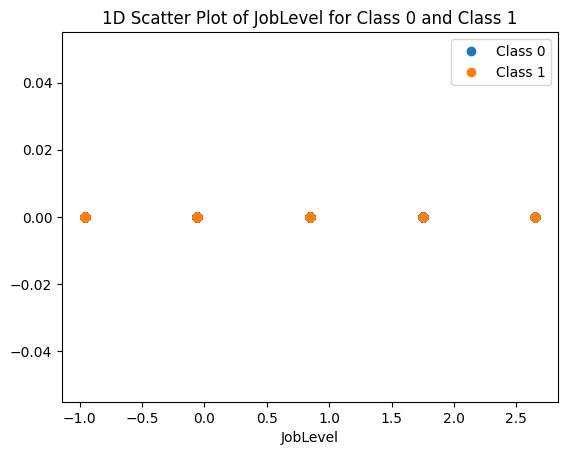

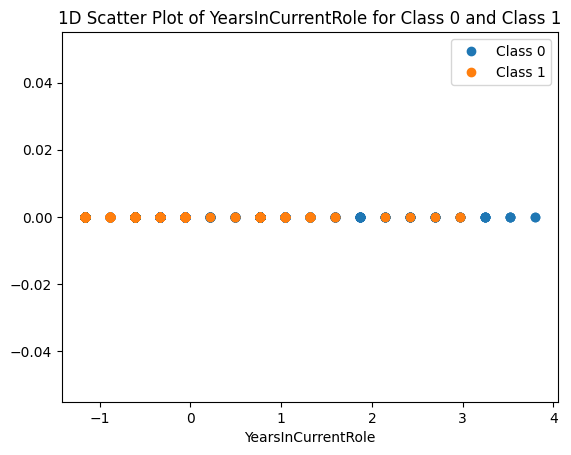

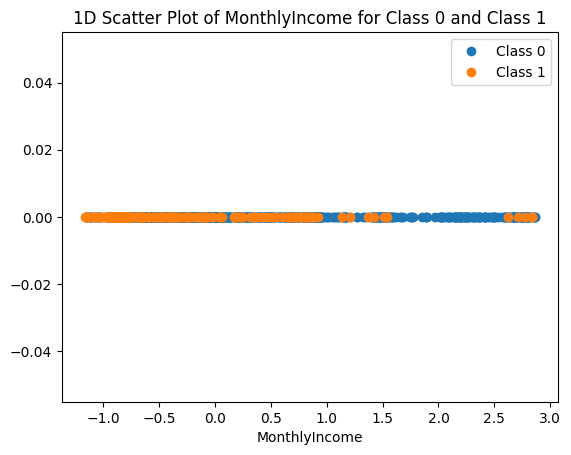

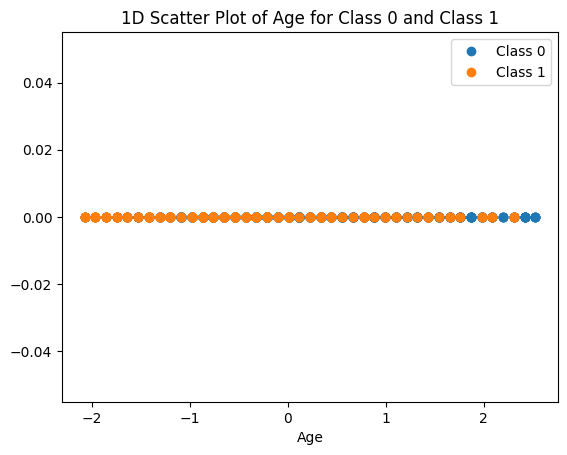

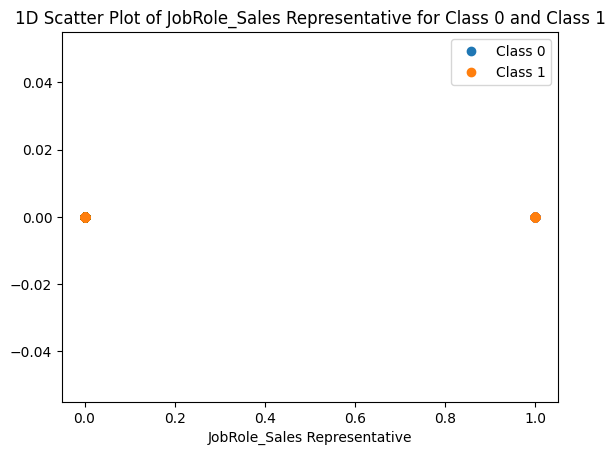

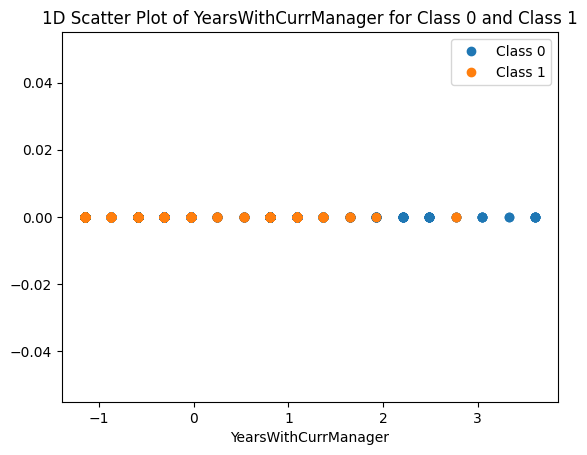

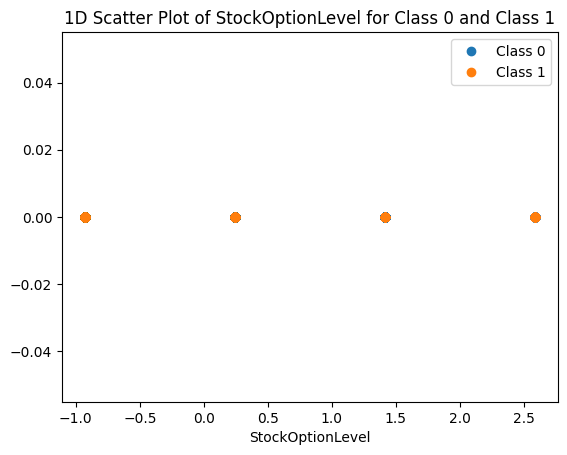

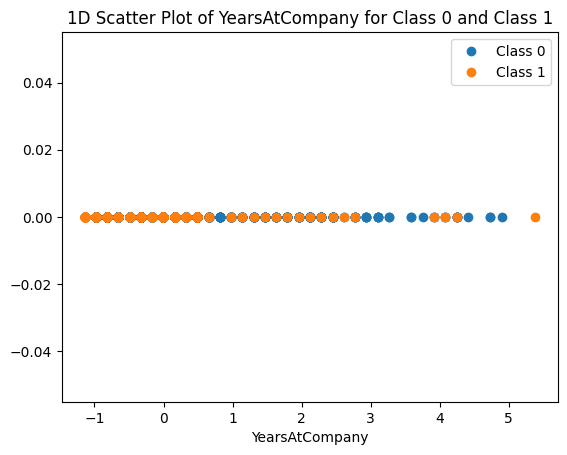

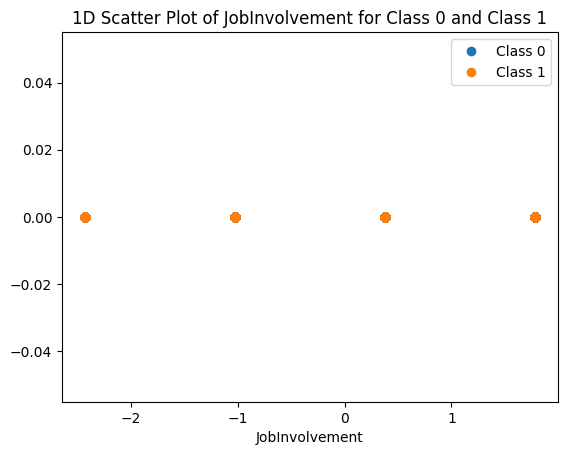

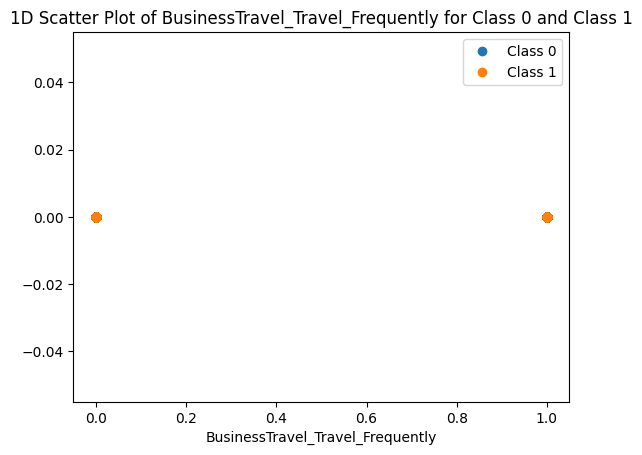

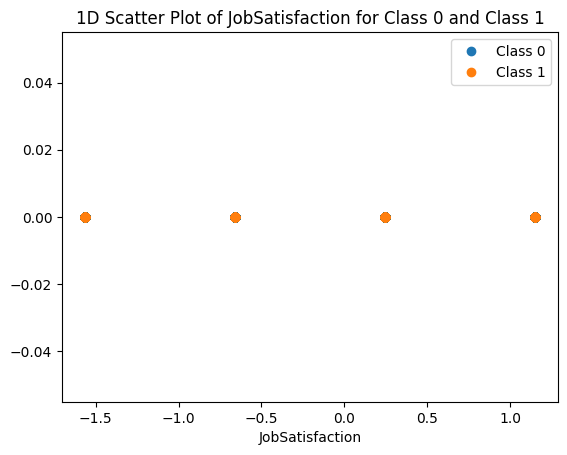

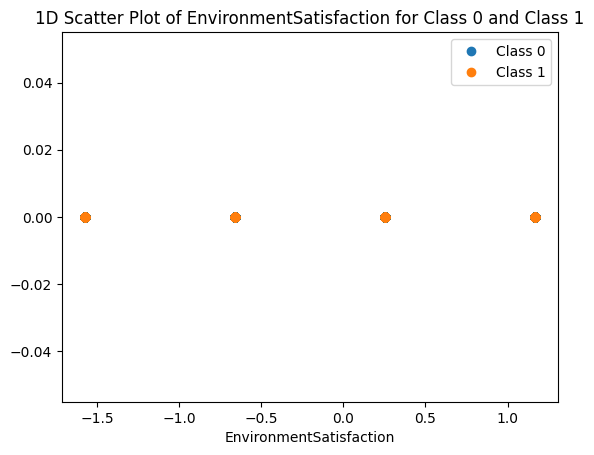

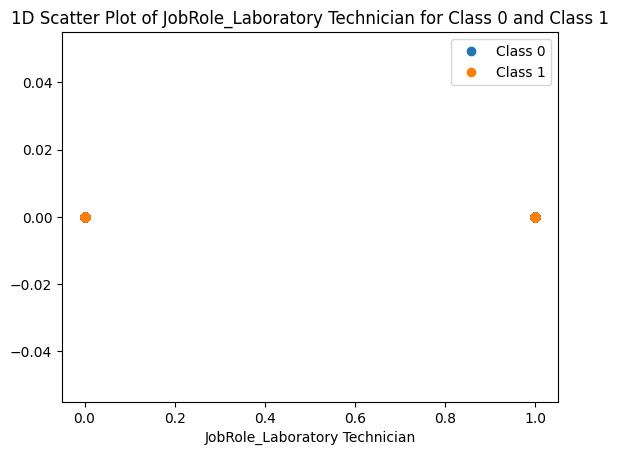

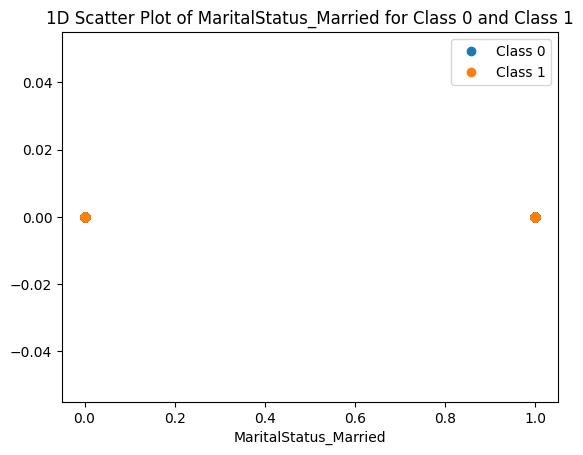

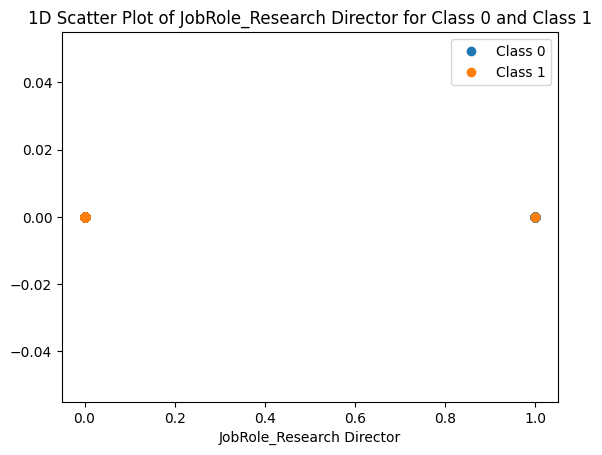

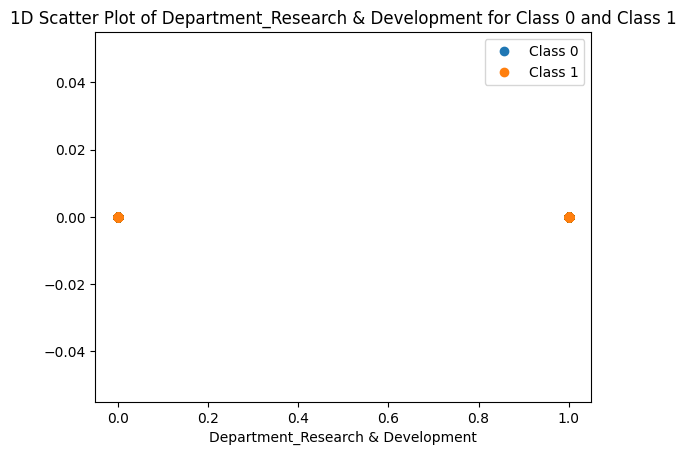

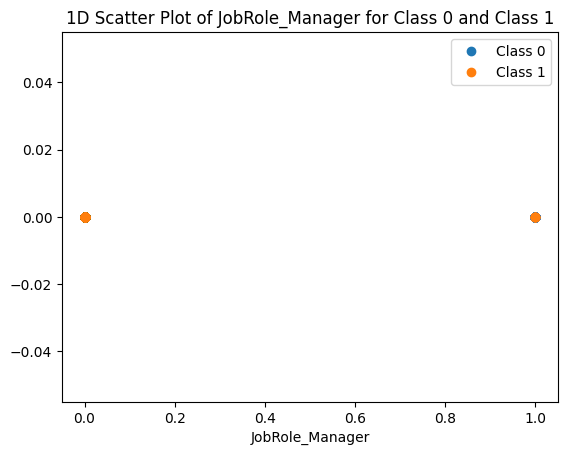

In [41]:
class_0 = features.loc[labels_df['Attrition'] == 0]
class_1 = features.loc[labels_df['Attrition'] == 1]

# class_0
# class_1
for col in top_20_columns:
    plt.plot(class_0[col], np.zeros_like(class_0[col]), 'o', label='Class 0')
    plt.plot(class_1[col], np.zeros_like(class_1[col]), 'o', label='Class 1')
    plt.legend()
    plt.xlabel(col)
    plt.title('1D Scatter Plot of ' + col + ' for Class 0 and Class 1')
    plt.show()

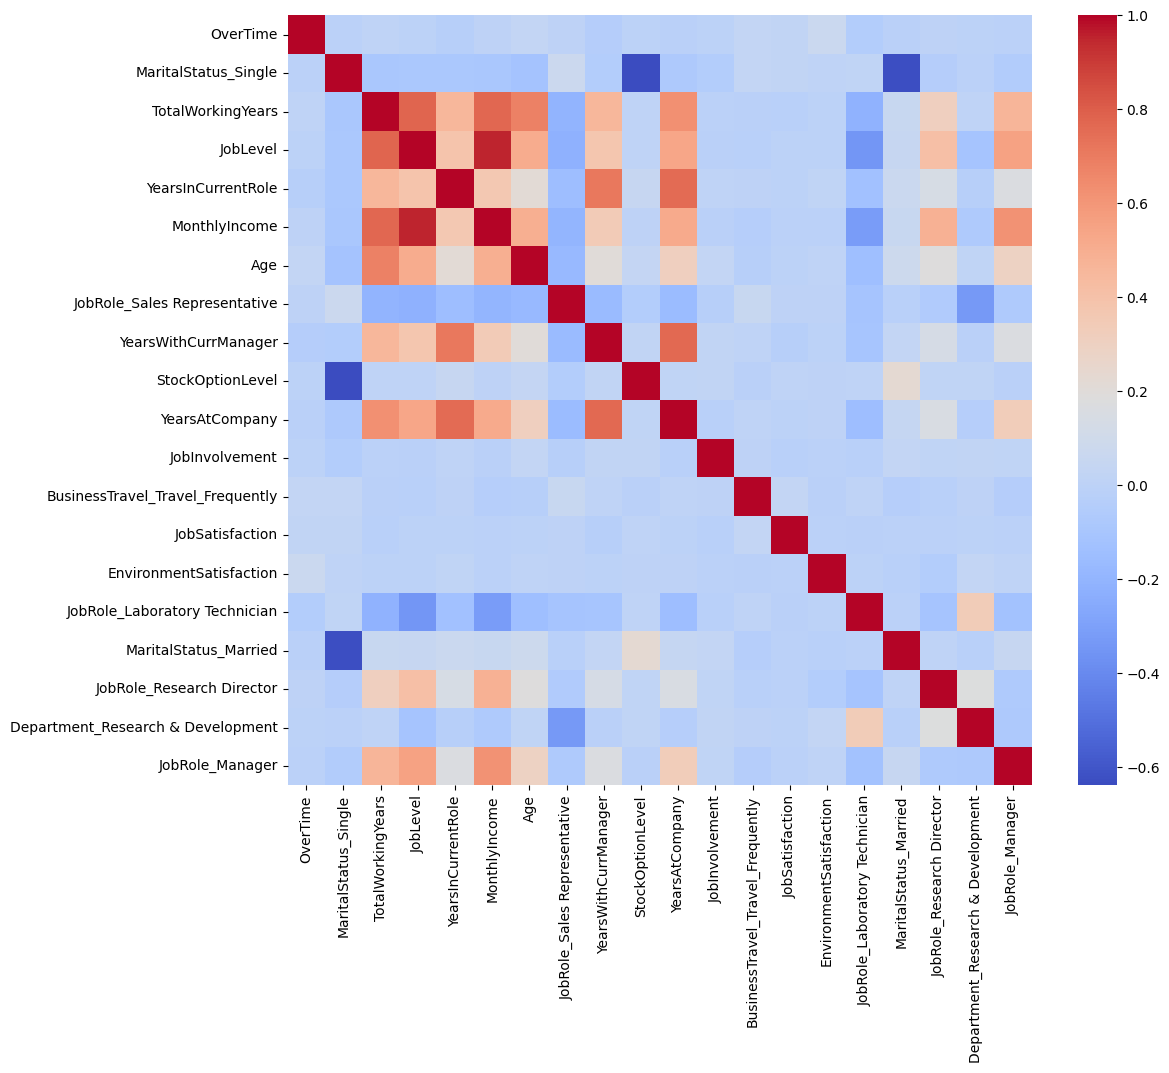

In [42]:
# correlation matrix
# correlation_matrix = features.corr()
# correlation_matrix = correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

#correlation matrix with top 20 columns
correlation_matrix = features_top_20.corr()
correlation_matrix = correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')

import seaborn as sn
plt.figure(figsize=(12, 10))
sn.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

plt.show()

## Pipeline

In [43]:

# Import necessary libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# import standard deviation
from statistics import stdev
# Assume X and y are your input matrices
# X --> (number of rows, number of columns), already scaled
# y --> binary target class (0 or 1)
# Dummy example data (replace these with your actual data)
# X = np.random.rand(100, 5) # Example feature matrix with 100 rows and 5 columns
# y = np.random.randint(0, 2, 100) # Example binary target vector
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( features_top_20, labels, test_size=0.2, random_state=42)
# Step 2: Initialize the Logistic Regression classifier
clf = LogisticRegression()
# Step 3: Train the classifier on the training data
clf.fit(X_train, y_train)
# Step 4: Make predictions on the test set
y_pred = clf.predict(X_test)
# Step 5: Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression classifier: {accuracy:.2f}")
# find std deviation 
std_dev = np.std(y_pred)
print(f"Standard deviation of the predictions: {std_dev:.2f}")


Accuracy of Logistic Regression classifier: 0.87
Standard deviation of the predictions: 0.26
